In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib

from sklearn.decomposition import PCA

In [2]:
# Exploring the data
train = pd.read_csv('Data/cervical_cancer.csv')
train.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
print(train.shape)

(858, 36)


In [4]:
## The 36 variables included are a mix of continuous (i.e. "Number of sexual partners") 
# and discrete (i.e. "Dx: HPV").
# Before we can perform PCA, we must ensure every variable is
# coded numerically and search for potential problematic or null values.
train.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [5]:
# Converting "object" variables to numeric typesfor i in range(1,28)
for i in range(1,28):
    train.iloc[:,i]=pd.to_numeric(train.iloc[:,i], errors='coerce')
train.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [6]:
# Checking for null values
train.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [7]:
# Method 1: Removing any columns with null values and performing PCA on remaining data
train2 = train[train.columns[28:37]]
train2.reset_index(drop=True, inplace=True)
train3= train[["Age"]]
train3.reset_index(drop=True, inplace=True)
train4=train[["STDs: Number of diagnosis"]]
train4.reset_index(drop=True, inplace=True)
frames=[train2,train3,train4]
first_PCA = pd.concat(frames, axis=1)
first_PCA.head()

,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age,STDs: Number of diagnosis
0,0,0,0,0,0,0,0,0,18,0
1,0,0,0,0,0,0,0,0,15,0
2,0,0,0,0,0,0,0,0,34,0
3,1,0,1,0,0,0,0,0,52,0
4,0,0,0,0,0,0,0,0,46,0


In [8]:
first_PCA.isnull().sum()

Dx:Cancer                    0
Dx:CIN                       0
Dx:HPV                       0
Dx                           0
Hinselmann                   0
Schiller                     0
Citology                     0
Biopsy                       0
Age                          0
STDs: Number of diagnosis    0
dtype: int64

In [9]:
# Applying PCA with a total of 6 components on the incomplete data
pca = PCA(n_components=6)
pca.fit(first_PCA)
pca_output = pca.transform(first_PCA)
ps = pd.DataFrame(pca_output)
ps.head()

,0,1,2,3,4,5
0,-8.820905,-0.115237,-0.063649,-0.007620,-0.026157,0.002439
1,-11.820868,-0.104960,-0.066636,-0.000485,-0.030340,0.003743
2,7.178898,-0.170050,-0.047721,-0.045676,-0.003846,-0.004519
3,25.182257,-0.054164,-0.171325,0.958673,-0.099339,-0.446758
4,19.178749,-0.211160,-0.035774,-0.074218,0.012887,-0.009737


In [10]:
# Checking how much variation is captured by each component
pca.explained_variance_ratio_

array([9.94555514e-01, 2.12570027e-03, 1.22138795e-03, 7.27405233e-04,
       5.56854274e-04, 3.08699692e-04])

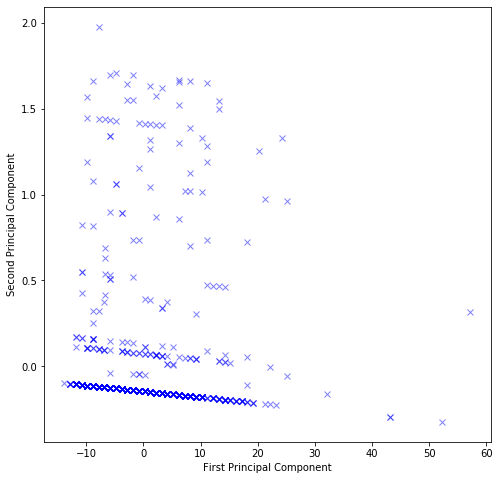

In [11]:
# Plotting the resulting scatterplot from the first two principal components
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
two_comp = pd.DataFrame(ps[[0,1]])

fig = plt.figure(figsize=(8,8))
plt.plot(two_comp[0], two_comp[1], 'x', markersize=6, color='blue', alpha=0.5)


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

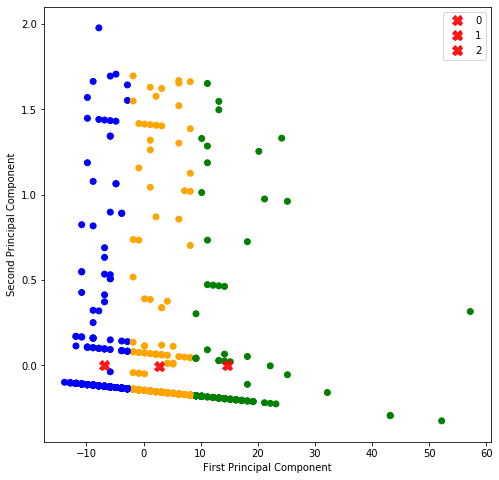

In [12]:
# Performing K-means clustering to see if data falls neatly into groups 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=3,random_state=42).fit(two_comp)
centers = clusterer.cluster_centers_
pred = clusterer.predict(two_comp)

fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','green']
colored = [colors[k] for k in pred]

plt.scatter(two_comp[0],two_comp[1],  color = colored)
for i,c in enumerate(centers):
    plt.plot(c[0], c[1], 'X', markersize=10, color='red', alpha=0.9, label=''+str(i))

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

In [13]:
# Check how closely age corresponds with clustering
first_PCA['cluster']=pred
first_PCA.head(10)

,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age,STDs: Number of diagnosis,cluster
0,0,0,0,0,0,0,0,0,18,0,1
1,0,0,0,0,0,0,0,0,15,0,1
2,0,0,0,0,0,0,0,0,34,0,0
3,1,0,1,0,0,0,0,0,52,0,2
4,0,0,0,0,0,0,0,0,46,0,2
5,0,0,0,0,0,0,0,0,42,0,2
6,0,0,0,0,1,1,0,1,51,0,2
7,0,0,0,0,0,0,0,0,26,0,0
8,1,0,1,1,0,0,0,0,45,0,2
9,0,0,0,0,0,0,0,0,44,0,2


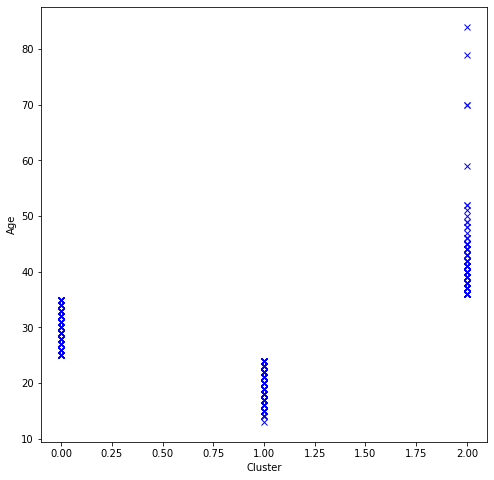

In [14]:
# Plot age, cluster to verify hypothesis that age has a large influence on this instance of PCA
fig = plt.figure(figsize=(8,8))
plt.plot(first_PCA['cluster'], first_PCA['Age'], 'x', markersize=6, color='blue')

plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

In [15]:
# Method 2: Imputing null values (using population level data from CDC when available) 
# and keeping all columns to perform PCA

# Continuous variable imputation (using median)
train['Number of sexual partners'].fillna(train['Number of sexual partners'].median(), inplace=True)
train['First sexual intercourse'].fillna(train['First sexual intercourse'].median(), inplace=True)
train['Num of pregnancies'].fillna(train['Num of pregnancies'].median(), inplace=True)
train['Smokes (years)'].fillna(train['Smokes (years)'].median(), inplace=True)
train['Smokes (packs/year)'].fillna(train['Smokes (packs/year)'].median(), inplace=True)
train['Hormonal Contraceptives (years)'].fillna(train['Hormonal Contraceptives (years)'].median(), inplace=True)
train['STDs (number)'].fillna(train['STDs (number)'].median(), inplace=True)
train['STDs: Time since first diagnosis'].fillna(train['STDs: Time since first diagnosis'].median(), inplace=True)
train['STDs: Time since last diagnosis'].fillna(train['STDs: Time since last diagnosis'].median(), inplace=True)
train['IUD (years)'].fillna(train['IUD (years)'].median(), inplace=True)

# Discrete variable imputation (without population estimates)
train['STDs:condylomatosis'].fillna(train['STDs:condylomatosis'].median(), inplace=True)
train['STDs:cervical condylomatosis'].fillna(train['STDs:cervical condylomatosis'].median(), inplace=True)
train['STDs:vaginal condylomatosis'].fillna(train['STDs:vaginal condylomatosis'].median(), inplace=True)
train['STDs:vulvo-perineal condylomatosis'].fillna(train['STDs:vulvo-perineal condylomatosis'].median(), inplace=True)
train['STDs:syphilis'].fillna(train['STDs:syphilis'].median(), inplace=True)
train['STDs:molluscum contagiosum'].fillna(train['STDs:molluscum contagiosum'].median(), inplace=True)
train['STDs'].fillna(train['STDs'].median(), inplace=True)
train['STDs:AIDS'].fillna(train['STDs:AIDS'].median(), inplace=True)
train['STDs:HIV'].fillna(train['STDs:HIV'].median(), inplace=True)

In [16]:
# Discrete variable imputation (with population estimates)
s = int(.136*train.shape[0])
smokes = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(smokes)
train['Smokes'].fillna(pd.Series(smokes), axis=0, inplace=True)

s = int(.103*train.shape[0])
iud = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(iud)
train['IUD'].fillna(pd.Series(iud), axis=0, inplace=True)

s = int(.229*train.shape[0])
hc = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(hc)
train['Hormonal Contraceptives'].fillna(pd.Series(hc), axis=0, inplace=True)

s = int(.399*train.shape[0])
hpv = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(hpv)
train['STDs:HPV'].fillna(pd.Series(hpv), axis=0, inplace=True)

s = int(.034*train.shape[0])
hep = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(hep)
train['STDs:Hepatitis B'].fillna(pd.Series(hep), axis=0, inplace=True)

s = int(.159*train.shape[0])
gen = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(gen)
train['STDs:genital herpes'].fillna(pd.Series(gen), axis=0, inplace=True)

s = int(.044*train.shape[0])
pid = np.hstack((np.ones(s), np.zeros(train.shape[0]-s)))
np.random.shuffle(pid)
train['STDs:pelvic inflammatory disease'].fillna(pd.Series(pid), axis=0, inplace=True)

In [17]:
# Checking if all null values have been removed
train.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [18]:
# Re-running PCA with imputed values
pca = PCA(n_components=6)
pca.fit(train)
pca_output2 = pca.transform(train)
ps2 = pd.DataFrame(pca_output2)
ps2.head()

,0,1,2,3,4,5
0,-9.353565,0.260331,-0.588480,-1.115863,-0.124550,-0.538188
1,-12.430139,0.534599,-0.075392,-1.175657,-0.123471,0.213519
2,6.313631,-2.168045,-2.893313,-0.951672,-0.558233,-0.720619
3,30.846404,43.867503,-2.217315,3.812684,-3.374407,-1.316093
4,20.804130,-4.560657,9.635538,3.001971,-0.747731,-0.790104


In [19]:
pca.explained_variance_ratio_ # First component no longer explains an overwhelming amount of variation

array([0.58892263, 0.14456319, 0.08996079, 0.05064155, 0.04768047,
       0.02384783])

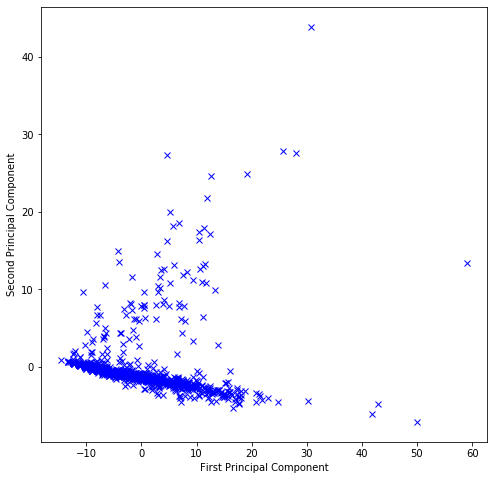

In [20]:
# Plotting the resulting scatterplot from the first two principal components
two_comp = pd.DataFrame(ps2[[0,1]])
fig = plt.figure(figsize=(8,8))
plt.plot(two_comp[0], two_comp[1], 'x', markersize=6, color='blue')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

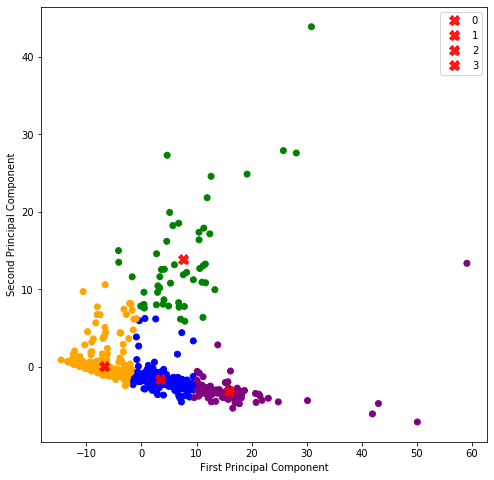

In [21]:
# Performing K-means clustering to see if data falls neatly into groups
tocluster = pd.DataFrame(ps2[[0,1]])
clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
pred = clusterer.predict(tocluster)

fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','green','purple']
colored = [colors[k] for k in pred]

plt.scatter(two_comp[0],two_comp[1],  color = colored)
for i,c in enumerate(centers):
    plt.plot(c[0], c[1], 'X', markersize=10, color='red', alpha=0.9, label=''+str(i))

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

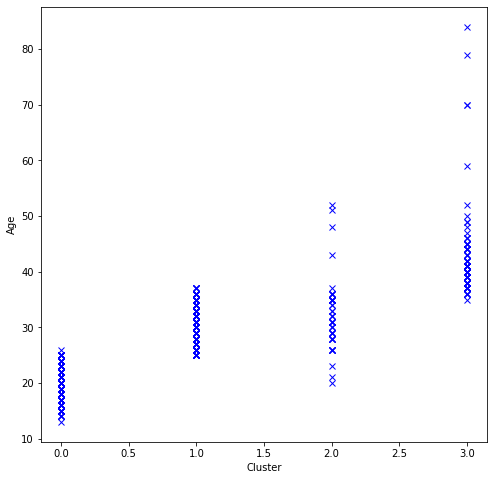

In [22]:
# Checking to see if age still has strong correlation with cluster
train['cluster']=pred

fig = plt.figure(figsize=(8,8))
plt.plot(train['cluster'], train['Age'], 'x', markersize=6, color='blue')

plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()